In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Indian_Kids_Screen_Time.csv")

In [3]:
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [4]:
print("Dataset Shape:", df.shape)

Dataset Shape: (9712, 8)


In [5]:
print("Columns:", df.columns)

Columns: Index(['Age', 'Gender', 'Avg_Daily_Screen_Time_hr', 'Primary_Device',
       'Exceeded_Recommended_Limit', 'Educational_to_Recreational_Ratio',
       'Health_Impacts', 'Urban_or_Rural'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [7]:
df.describe()

,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio
count,9712.000000,9712.000000,9712.000000
mean,12.979201,4.352837,0.427226
std,3.162437,1.718232,0.073221
min,8.000000,0.000000,0.300000
25%,10.000000,3.410000,0.370000
50%,13.000000,4.440000,0.430000
75%,16.000000,5.380000,0.480000
max,18.000000,13.890000,0.600000


In [8]:
df.isnull().sum()

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64

In [9]:
df['Health_Impacts'] = df['Health_Impacts'].fillna("None")

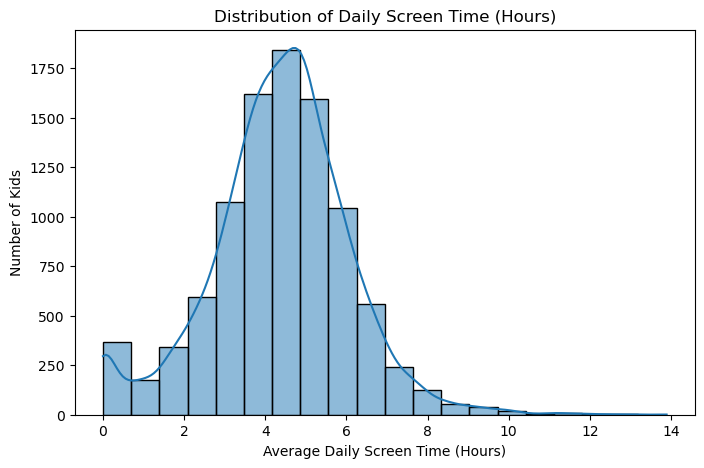

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df['Avg_Daily_Screen_Time_hr'], bins=20, kde=True)
plt.title("Distribution of Daily Screen Time (Hours)")
plt.xlabel("Average Daily Screen Time (Hours)")
plt.ylabel("Number of Kids")
plt.show()

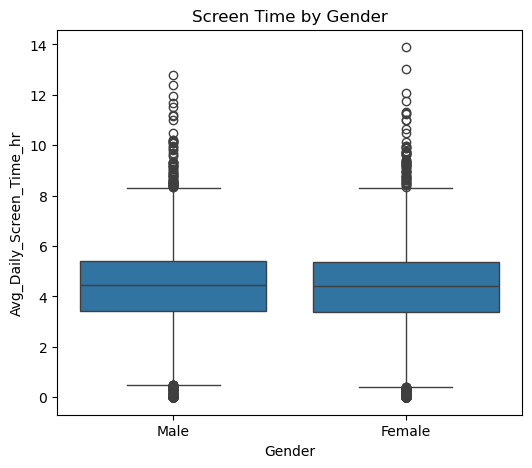

In [11]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Gender', y='Avg_Daily_Screen_Time_hr', data=df)
plt.title("Screen Time by Gender")
plt.show()

In [13]:
df['Age_Group'] = pd.cut(df['Age'],
                         bins=[5,10,13,16,18],
                         labels=['6-10','11-13','14-16','17-18'])

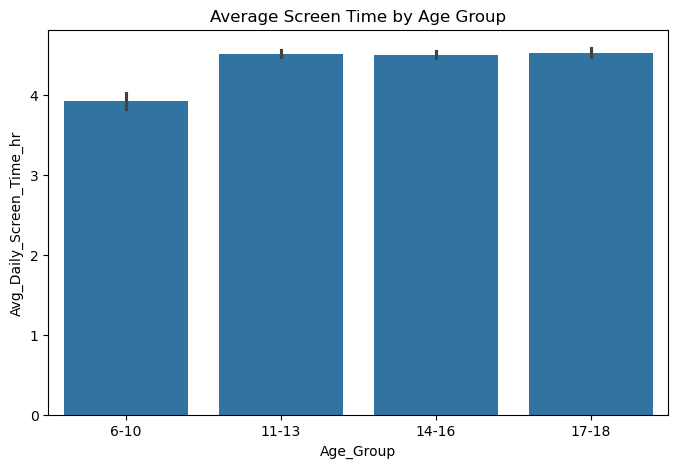

In [14]:
plt.figure(figsize=(8,5))
sns.barplot(x='Age_Group', y='Avg_Daily_Screen_Time_hr', data=df)
plt.title("Average Screen Time by Age Group")
plt.show()

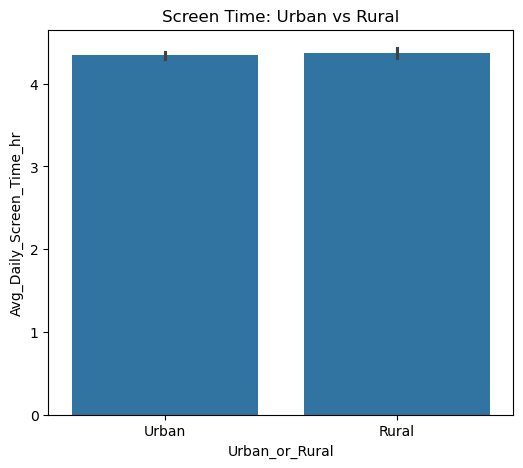

In [15]:
plt.figure(figsize=(6,5))
sns.barplot(x='Urban_or_Rural', y='Avg_Daily_Screen_Time_hr', data=df)
plt.title("Screen Time: Urban vs Rural")
plt.show()

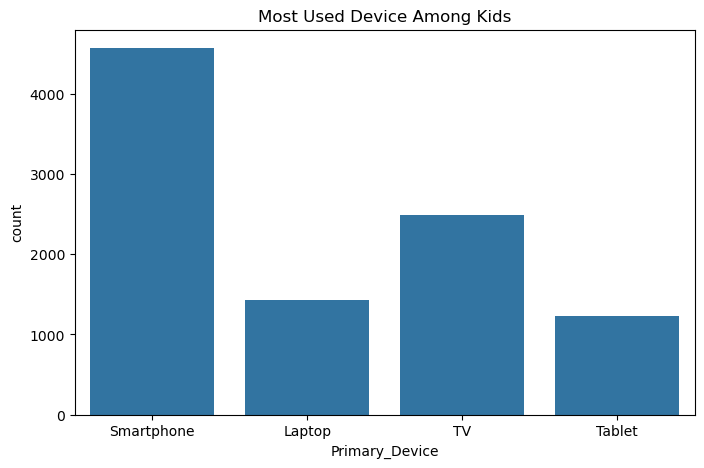

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(x='Primary_Device', data=df)
plt.title("Most Used Device Among Kids")
plt.show()

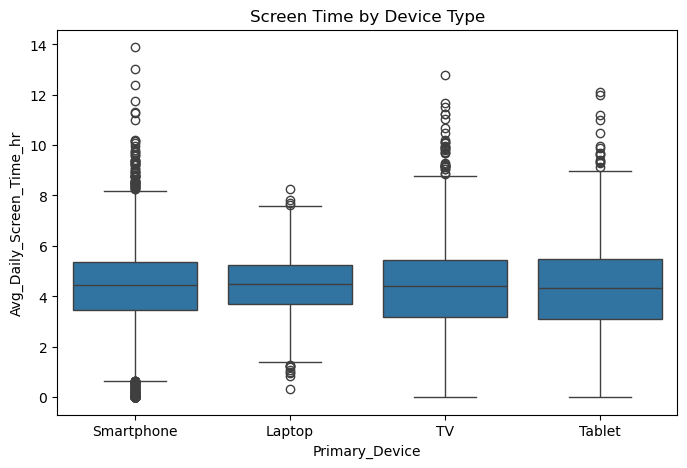

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Primary_Device', y='Avg_Daily_Screen_Time_hr', data=df)
plt.title("Screen Time by Device Type")
plt.show()

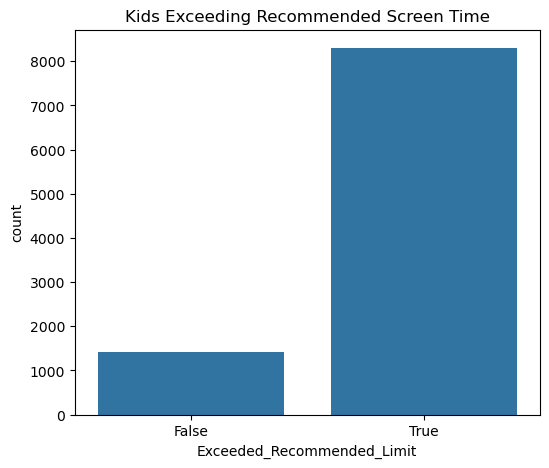

In [21]:
plt.figure(figsize=(6,5))
sns.countplot(x='Exceeded_Recommended_Limit', data=df)
plt.title("Kids Exceeding Recommended Screen Time")
plt.show()

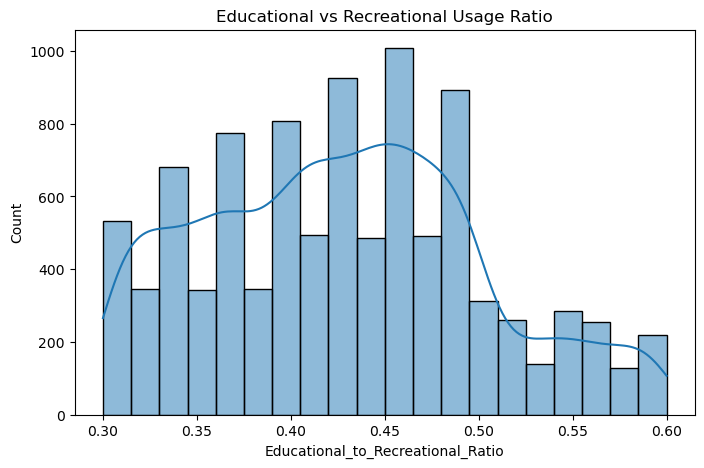

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(df['Educational_to_Recreational_Ratio'], bins=20, kde=True)
plt.title("Educational vs Recreational Usage Ratio")
plt.show()

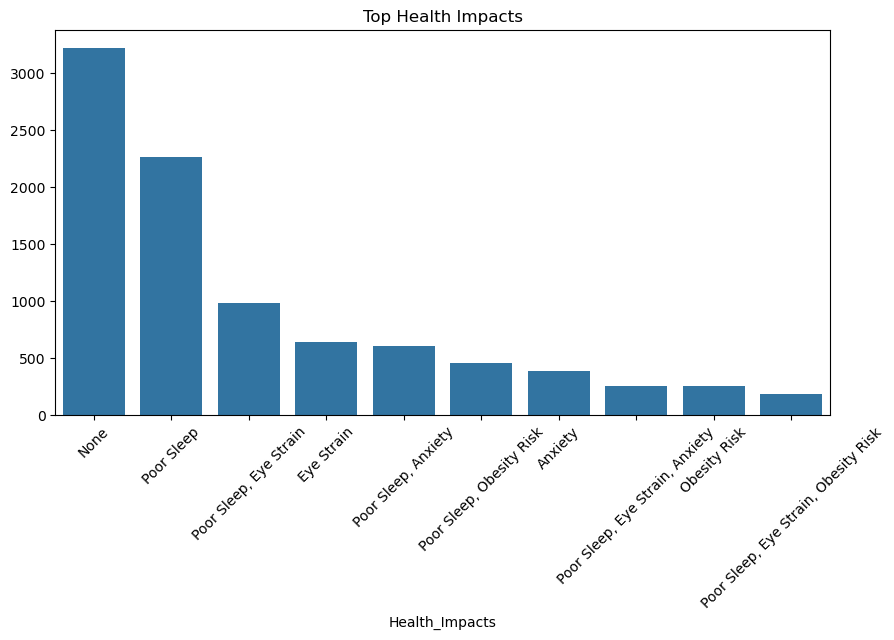

In [23]:
health_counts = df['Health_Impacts'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=health_counts.index, y=health_counts.values)
plt.xticks(rotation=45)
plt.title("Top Health Impacts")
plt.show()